In [1]:
!pip install -U plotly==5.24.1 kaleido==0.2.1


In [2]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from scipy import stats

pio.renderers.default = "png"
df = pd.read_csv("AB_NYC_2019.csv")


In [3]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [4]:

cols_to_drop = ['name', 'host_name', 'last_review']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


df = df.dropna()



In [5]:
print("Summary statistics:\n", df.describe(include='all'))


Summary statistics:
                   id       host_id neighbourhood_group neighbourhood  \
count   4.889500e+04  4.889500e+04               48895         48895   
unique           NaN           NaN                   5           221   
top              NaN           NaN           Manhattan  Williamsburg   
freq             NaN           NaN               21661          3920   
mean    1.901714e+07  6.762001e+07                 NaN           NaN   
std     1.098311e+07  7.861097e+07                 NaN           NaN   
min     2.539000e+03  2.438000e+03                 NaN           NaN   
25%     9.471945e+06  7.822033e+06                 NaN           NaN   
50%     1.967728e+07  3.079382e+07                 NaN           NaN   
75%     2.915218e+07  1.074344e+08                 NaN           NaN   
max     3.648724e+07  2.743213e+08                 NaN           NaN   

            latitude     longitude        room_type         price  \
count   48895.000000  48895.000000           

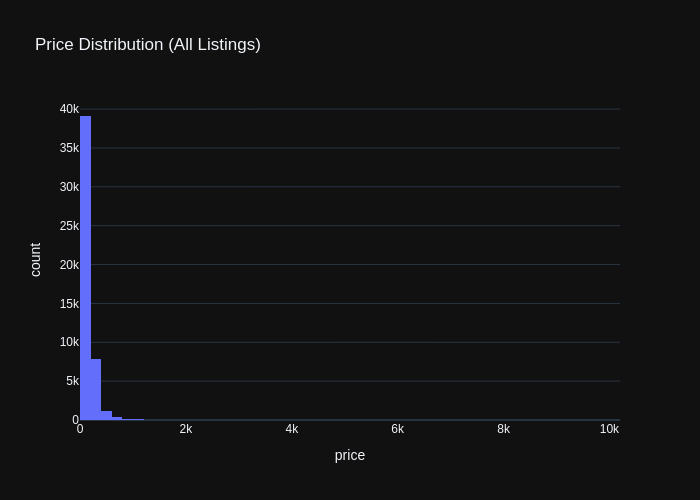

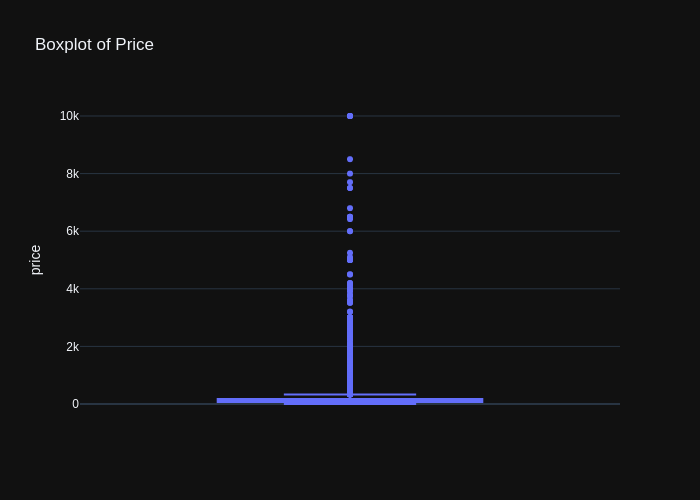

In [6]:
fig = px.histogram(df, x='price', nbins=100,
                   title='Price Distribution (All Listings)',
                   template='plotly_dark')
fig.show()

fig = px.box(df, y='price', title='Boxplot of Price',
             template='plotly_dark')
fig.show()


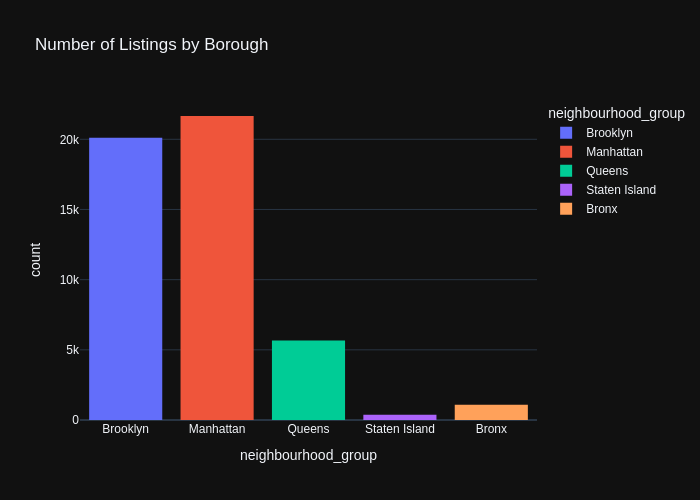

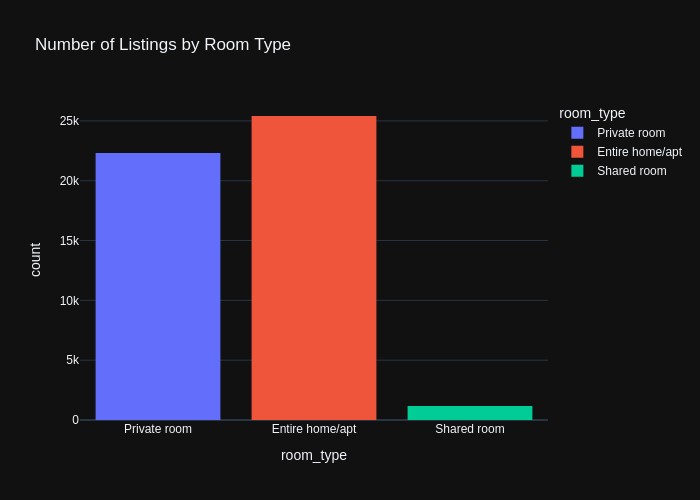

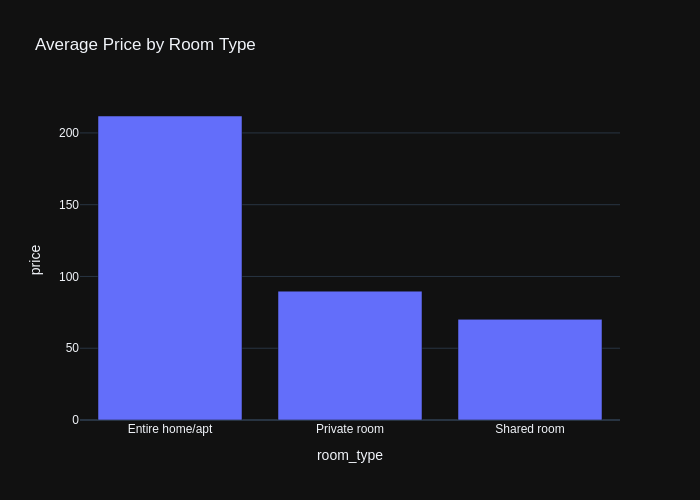

In [7]:
fig = px.histogram(df, x='neighbourhood_group', color='neighbourhood_group',
                   title='Number of Listings by Borough',
                   template='plotly_dark')
fig.show()

fig = px.histogram(df, x='room_type', color='room_type',
                   title='Number of Listings by Room Type',
                   template='plotly_dark')
fig.show()

room_price = df.groupby('room_type')['price'].mean().reset_index()
fig = px.bar(room_price, x='room_type', y='price',
             title='Average Price by Room Type',
             template='plotly_dark')
fig.show()


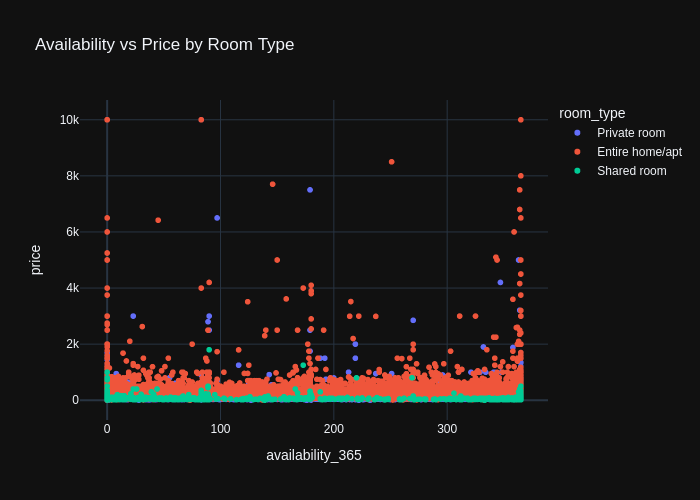

In [8]:
fig = px.scatter(df, x='availability_365', y='price', color='room_type',
                 title='Availability vs Price by Room Type',
                 template='plotly_dark')
fig.show()


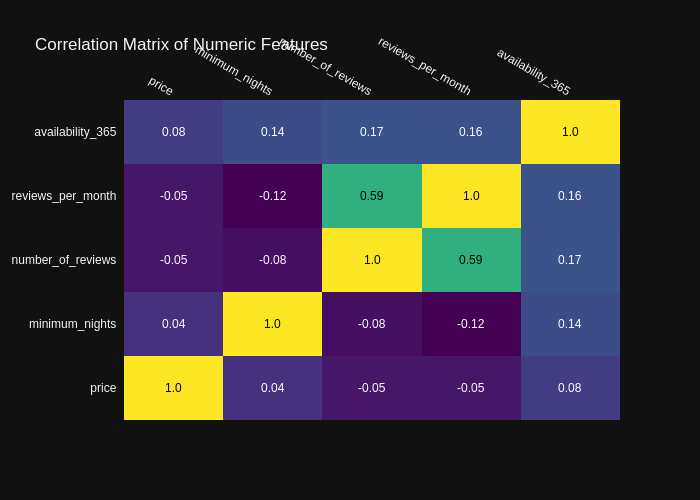

In [9]:
numeric_df = df[['price', 'minimum_nights', 'number_of_reviews',
                 'reviews_per_month', 'availability_365']]
corr = numeric_df.corr().round(2)

fig = ff.create_annotated_heatmap(
    corr.values,
    x=corr.columns.tolist(),
    y=corr.index.tolist(),
    annotation_text=corr.values,
    colorscale='Viridis'
)
fig.update_layout(title_text='Correlation Matrix of Numeric Features',
                  template='plotly_dark')
fig.show()


In [10]:
manhattan = df[df['neighbourhood_group'] == 'Manhattan']['price']
brooklyn  = df[df['neighbourhood_group'] == 'Brooklyn']['price']

t_stat, p_val = stats.ttest_ind(manhattan, brooklyn, equal_var=False)
print(f"T‑Test: Manhattan vs Brooklyn  |  t = {t_stat:.2f},  p = {p_val:.4f}")


T‑Test: Manhattan vs Brooklyn  |  t = 30.48,  p = 0.0000
